In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

In a generalized linear model, $h$ is a link function and $T$ is an affine map (that is, a linear regressor). We set $g = h^{-1} \circ T$ to be our generalized linear model.

In [3]:
h = np.vectorize(lambda x : - 1/x) # modify h as needed
h_inv = np.vectorize(lambda x : -1/x)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv("./data_synthetic/synthetic_data_exp.csv", index_col=0)
df

,X,y
0,0.000000,2.045970
1,0.067114,1.794328
2,0.134228,1.588982
3,0.201342,1.383694
4,0.268456,1.172789
...,...,...
145,9.731544,0.080800
146,9.798658,0.021029
147,9.865772,0.001763
148,9.932886,0.008998


In [6]:
X = df["X"].to_numpy().reshape(-1, 1)
y = df["y"].to_numpy()


y_transformed = h(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
regr = LinearRegression()
regr.fit(X_train, h(y_train))

y_pred = h_inv(regr.predict(X_test))

print("Coefficients: \n", regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [-5.72553575]
Mean squared error: 0.04
Coefficient of determination: -0.06


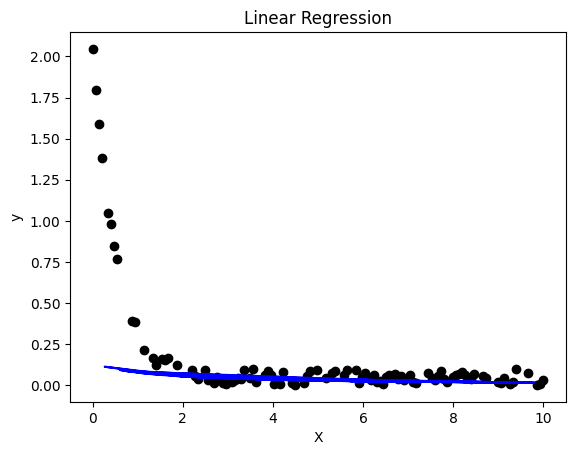

In [10]:
plt.scatter(X_train, y_train, color="black")
plt.plot(X_test, y_pred, color="blue")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression")
plt.show()

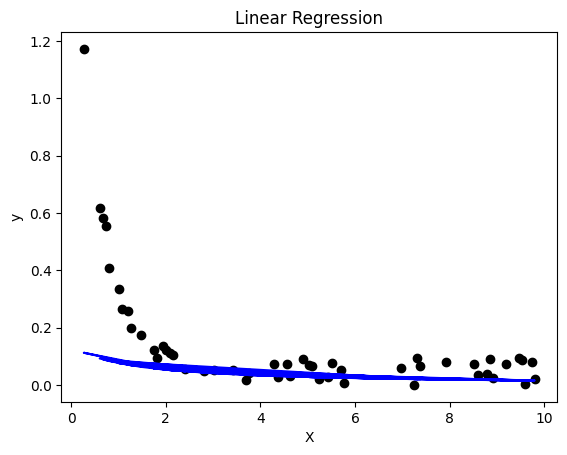

In [9]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression")
plt.show()